<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/main/Lesson_24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
drive.mount('')
df = pd.read_csv('')

Mounted at /content/drive


In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(df)

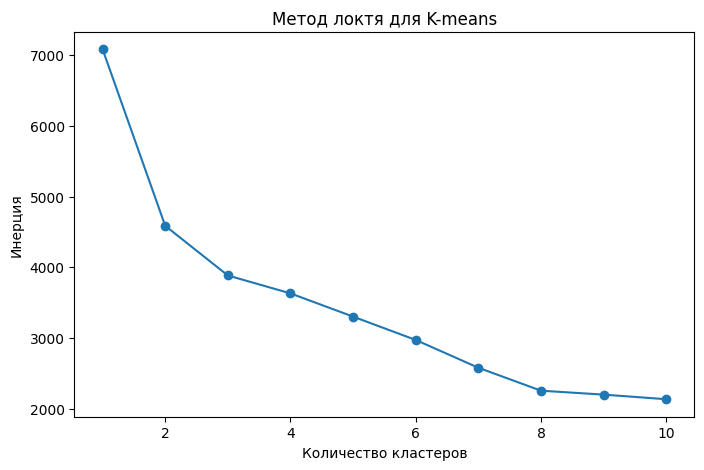

In [6]:
# Метод локтя для K-means
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для K-means')
plt.show()


In [8]:
best_score = -100
best_params = {}  # Словарь для хранения лучших параметров
silhouette_coefficients = {}  # Словарь для хранения силуэтных коэффициентов

# Подбираем параметры для DBSCAN
for j in tqdm(range(5, 30)):
    for k in range(5, 300, 1):
        epsilon = k / 10
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(X)

        try:
            score = silhouette_score(X, clusters)
            silhouette_coefficients[(j, epsilon)] = score  # Сохраняем оценку
        except:
            continue  # Пропускаем случаи, когда silhouette_score не может быть рассчитан

        # Проверяем, лучше ли новый результат
        if score > best_score:
            best_score = score
            best_params = {'min_samples': j, 'eps': epsilon}

# Выводим лучшие параметры
print(f"Лучшие параметры для DBSCAN: min_samples={best_params['min_samples']}, eps={best_params['eps']:.3f}, Silhouette Score={best_score:.2f}")

100%|██████████| 25/25 [01:53<00:00,  4.52s/it]

Лучшие параметры для DBSCAN: min_samples=6, eps=4.400, Silhouette Score=0.55


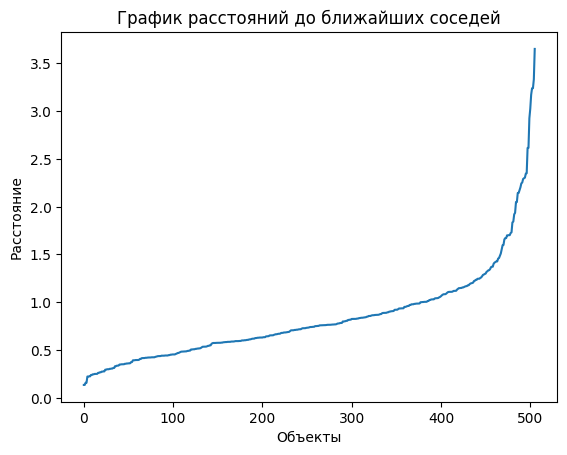

In [9]:
# Найдем расстояния до ближайших соседей
neighbors_boston = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors_boston.fit(X)
distances_boston, indices_boston = neighbors_boston.kneighbors(X)

# Сортируем расстояния по возрастанию
distances_boston = np.sort(distances_boston[:, 1], axis=0)

# Строим график
plt.plot(distances_boston)
plt.title('График расстояний до ближайших соседей')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

In [11]:
# K-means кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [33]:
# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
df['dbscan_cluster'] = dbscan_labels

In [35]:
# Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

In [46]:
# Применение PCA для снижения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

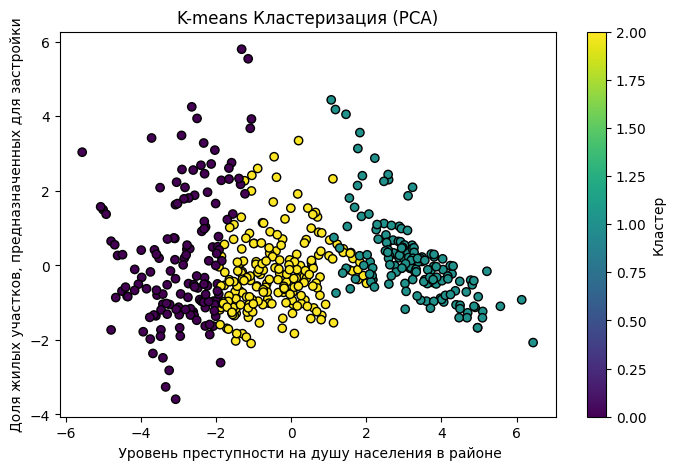

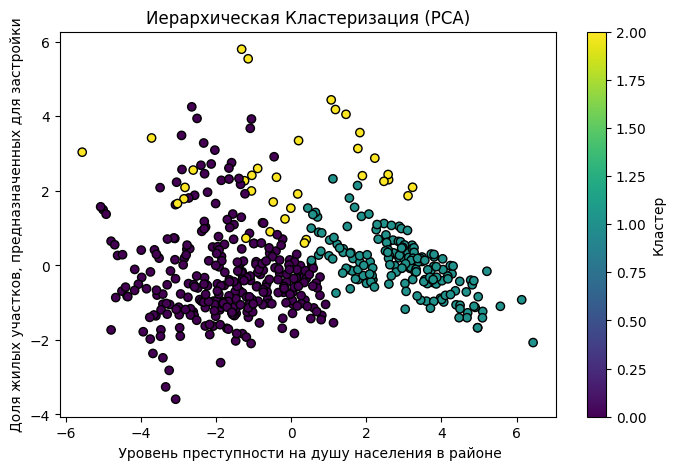

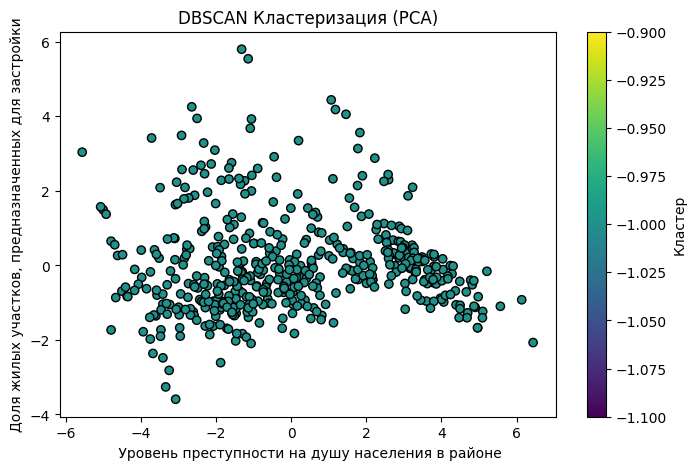

In [48]:
# Визуализация кластеров с PCA
def plot_pca_clusters(labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.xlabel(' Уровень преступности на душу населения в районе')
    plt.ylabel('Доля жилых участков, предназначенных для застройки')
    plt.colorbar(label='Кластер')
    plt.show()

plot_pca_clusters(kmeans_labels, 'K-means Кластеризация (PCA)')
plot_pca_clusters(hierarchical_labels, 'Иерархическая Кластеризация (PCA)')
plot_pca_clusters(dbscan_labels, 'DBSCAN Кластеризация (PCA)')

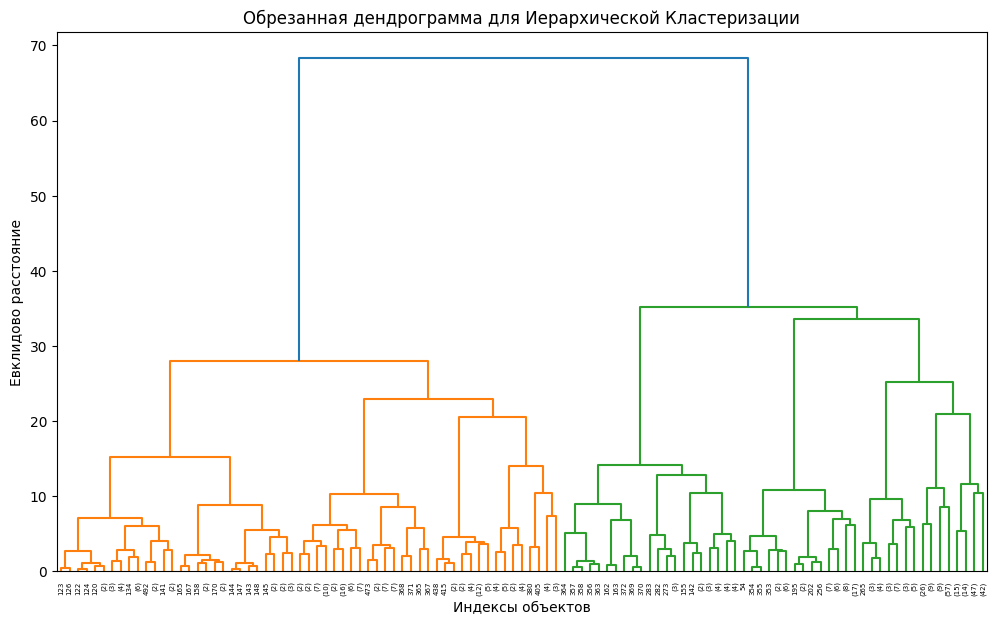

In [37]:
# Построение и обрезка дендрограммы для Иерархической Кластеризации
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=6)
plt.title('Обрезанная дендрограмма для Иерархической Кластеризации')
plt.xlabel('Индексы объектов')
plt.ylabel('Евклидово расстояние')
plt.show()